In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
df= pd.read_csv('/content/DFORE199.csv')

In [2]:
df.fillna(0, inplace=True)

In [3]:
df.columns

Index(['cohort_flag', 'location_id', 'accountname', 'InstallCap',
       'FirstVendDate', 'DaysFromFirstVend', 'DaysWVend', 'Vends', 'Spends',
       'DigitalVends', 'DigitalUsers', 'AppSpend', 'AppUser'],
      dtype='object')

## Welch T-Test Cross Chck

In [4]:
def compute_metrics(x):
  x['GRPMld']= 30.42*x['Spends']/(x['DaysFromFirstVend']*x['InstallCap'])
  x['GRPMvd']= 30.42*x['Spends']/(x['DaysWVend']*x['InstallCap'])
  x['VPDUld']= 30.42*x['DigitalVends']/(max(x['DigitalUsers'],1)*x['DaysFromFirstVend'])
  x['VPDUvd']= 30.42*x['DigitalVends']/(max(x['DigitalUsers'],1)*x['DaysWVend'])
  x['ARPUld']= 30.42*x['AppSpend']/(max(x['AppUser'],1)*x['DaysFromFirstVend'])
  x['ARPUvd']= 30.42*x['AppSpend']/(max(x['AppUser'],1)*x['DaysWVend'])
  return(x)

In [5]:
df1=df.apply(compute_metrics, axis=1)

In [6]:
df1.isnull().sum()

cohort_flag          0
location_id          0
accountname          0
InstallCap           0
FirstVendDate        0
DaysFromFirstVend    0
DaysWVend            0
Vends                0
Spends               0
DigitalVends         0
DigitalUsers         0
AppSpend             0
AppUser              0
GRPMld               0
GRPMvd               0
VPDUld               0
VPDUvd               0
ARPUld               0
ARPUvd               0
dtype: int64

In [7]:
sf1= df1.groupby('cohort_flag')['GRPMld', 'GRPMvd','VPDUld', 'VPDUvd', 'ARPUld', 'ARPUvd'].agg([np.size, np.mean, np.std, np.var])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [8]:
sf1

GRPMld                        ...     ARPUvd                      
               size       mean        std  ...       mean       std         var
cohort_flag                                ...                                 
control       855.0  40.723403  34.836746  ...  16.025938  28.72865  825.335308
test         3648.0  44.087664  87.583468  ...  15.541596  21.19473  449.216571

[2 rows x 24 columns]

In [9]:
# sf1.loc['test'][c]['mean']

In [10]:
#print('|', 'Metric', 'Welch Statistics', '')
print('|','Metric','|','S_Welch ','             |','Statistics','           |','Degrees of Freedom','|  ', 'P Value')
for c in ['GRPMld', 'GRPMvd','VPDUld', 'VPDUvd', 'ARPUld', 'ARPUvd']:
  t_score = stats.ttest_ind_from_stats(sf1.loc['test'][c]['mean'], sf1.loc['test'][c]['std'], sf1.loc['test'][c]['size'], \
                               sf1.loc['control'][c]['mean'], sf1.loc['control'][c]['std'], sf1.loc['control'][c]['size'], \
                               equal_var=False)
  s_welch = np.sqrt(sf1.loc['test'][c]['var']/sf1.loc['test'][c]['size'] + sf1.loc['control'][c]['var']/sf1.loc['control'][c]['size'] )
  t=(sf1.loc['test'][c]['mean']-sf1.loc['control'][c]['mean'])/s_welch
  df_num = (sf1.loc['test'][c]['var']/sf1.loc['test'][c]['size'] + sf1.loc['control'][c]['var']/sf1.loc['control'][c]['size'])**2
  df_dem = ((sf1.loc['test'][c]['var']/sf1.loc['test'][c]['size'])**2/(sf1.loc['test'][c]['size']-1)) + \
    (sf1.loc['control'][c]['var']/sf1.loc['test'][c]['size'])**2/(sf1.loc['test'][c]['size']-1)
  df = df_num/df_dem  
  print('|',c,'|',s_welch,'|',t,'|',df,'|', t_score[1])

| Metric | S_Welch               | Statistics            | Degrees of Freedom |   P Value
| GRPMld | 1.8767452112171554 | 1.7926039337228925 | 9982.55113992256 | 0.07312326522378364
| GRPMvd | 1.9654304581859534 | 1.5092211535012638 | 11692.002955792928 | 0.13134377692046684
| VPDUld | 0.22158118678497865 | -0.8111247169768948 | 53175.837520372996 | 0.4174487320448612
| VPDUvd | 0.6999468542946982 | -0.8601038262427454 | 66806.0968830976 | 0.38992751170866746
| ARPUld | 0.40497591961698337 | -0.6777400776270691 | 52663.403579567115 | 0.49806143463038544
| ARPUvd | 1.0432856565868711 | -0.46424666565965905 | 65119.416958767746 | 0.6425644511558061


## T-Test GRPM < 400

In [11]:
df2= df1.loc[df1.GRPMld < 400]

In [12]:
sf2= df2.groupby('cohort_flag')['GRPMld', 'GRPMvd','VPDUld', 'VPDUvd', 'ARPUld', 'ARPUvd'].agg([np.size, np.mean, np.std, np.var])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [13]:
sf2

GRPMld                        ...     ARPUvd                       
               size       mean        std  ...       mean        std         var
cohort_flag                                ...                                  
control       855.0  40.723403  34.836746  ...  16.025938  28.728650  825.335308
test         3646.0  42.555012  35.240906  ...  15.533872  21.197787  449.346155

[2 rows x 24 columns]

In [14]:
#print('|', 'Metric', 'Welch Statistics', '')
print('|','Metric','|','S_Welch ','             |','Statistics','           |','Degrees of Freedom','|  ', 'P Value')
for c in ['GRPMld', 'GRPMvd','VPDUld', 'VPDUvd', 'ARPUld', 'ARPUvd']:
  t_score = stats.ttest_ind_from_stats(sf2.loc['test'][c]['mean'], sf2.loc['test'][c]['std'], sf2.loc['test'][c]['size'], \
                               sf2.loc['control'][c]['mean'], sf2.loc['control'][c]['std'], sf2.loc['control'][c]['size'], \
                               equal_var=False)
  s_welch = np.sqrt(sf2.loc['test'][c]['var']/sf2.loc['test'][c]['size'] + sf2.loc['control'][c]['var']/sf2.loc['control'][c]['size'] )
  t=(sf2.loc['test'][c]['mean']-sf2.loc['control'][c]['mean'])/s_welch
  df_num = (sf2.loc['test'][c]['var']/sf2.loc['test'][c]['size'] + sf2.loc['control'][c]['var']/sf2.loc['control'][c]['size'])**2
  df_dem = ((sf2.loc['test'][c]['var']/sf2.loc['test'][c]['size'])**2/(sf2.loc['test'][c]['size']-1)) + \
    (sf2.loc['control'][c]['var']/sf2.loc['test'][c]['size'])**2/(sf2.loc['test'][c]['size']-1)
  df = df_num/df_dem  
  print('|',c,'|',s_welch,'|',t,'|',df,'|', t_score[1])

| Metric | S_Welch               | Statistics            | Degrees of Freedom |   P Value
| GRPMld | 1.3266648446058296 | 1.38061146398497 | 49780.688801096374 | 0.16763658534927464
| GRPMvd | 1.4534109519998293 | 0.9915982367808938 | 53738.65902461657 | 0.3215871317493598
| VPDUld | 0.2215818809490855 | -0.8303799951466069 | 53114.015798910514 | 0.4064828107921361
| VPDUvd | 0.6999840887646038 | -0.8629312063594973 | 66697.88003623176 | 0.3883716649577713
| ARPUld | 0.404940218169083 | -0.7046247395856153 | 52633.266334264 | 0.4811745770369946
| ARPUvd | 1.043335061688637 | -0.4716271293003097 | 65016.10338377674 | 0.6372880573475289


## GRPM Comparison

In [15]:
df1.describe()

,InstallCap,DaysFromFirstVend,DaysWVend,Vends,Spends,DigitalVends,DigitalUsers,AppSpend,AppUser,GRPMld,GRPMvd,VPDUld,VPDUvd,ARPUld,ARPUvd
count,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000
mean,8.812347,48.160338,34.078170,437.324006,601.240913,145.390628,13.818343,149.547173,7.158561,43.448881,57.347654,5.646890,9.839829,9.870854,15.633559
std,8.484240,18.199120,20.171601,662.630508,944.524402,398.984688,31.282065,405.972348,16.367739,80.286987,80.897428,5.680256,14.752662,10.436434,22.814472
min,1.000000,1.000000,1.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.012967,0.330652,0.000000,0.000000,0.000000,0.000000
25%,4.000000,36.000000,15.000000,71.000000,97.750000,7.000000,2.000000,3.500000,1.000000,14.819743,29.152500,2.253333,3.802500,2.028000,3.456818
50%,6.000000,60.000000,35.000000,224.000000,313.500000,45.000000,6.000000,42.000000,3.000000,35.696939,49.594309,4.770409,6.800570,8.025553,11.284839
75%,11.000000,62.000000,54.000000,535.000000,744.500000,144.500000,15.000000,145.500000,8.000000,60.208805,74.702024,7.469153,10.843376,14.259375,19.257037
max,186.000000,62.000000,62.000000,13450.000000,23521.250000,13309.000000,828.000000,12939.500000,442.000000,4816.384773,4816.384773,121.680000,433.485000,124.215000,650.227500


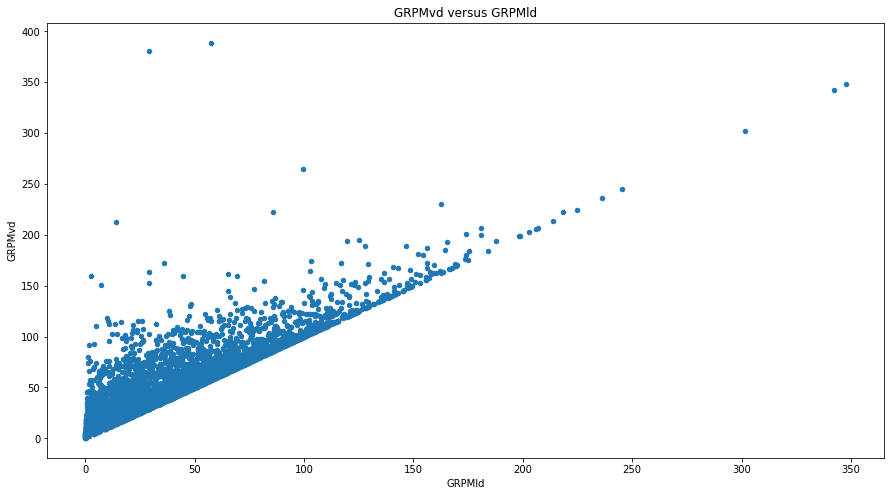

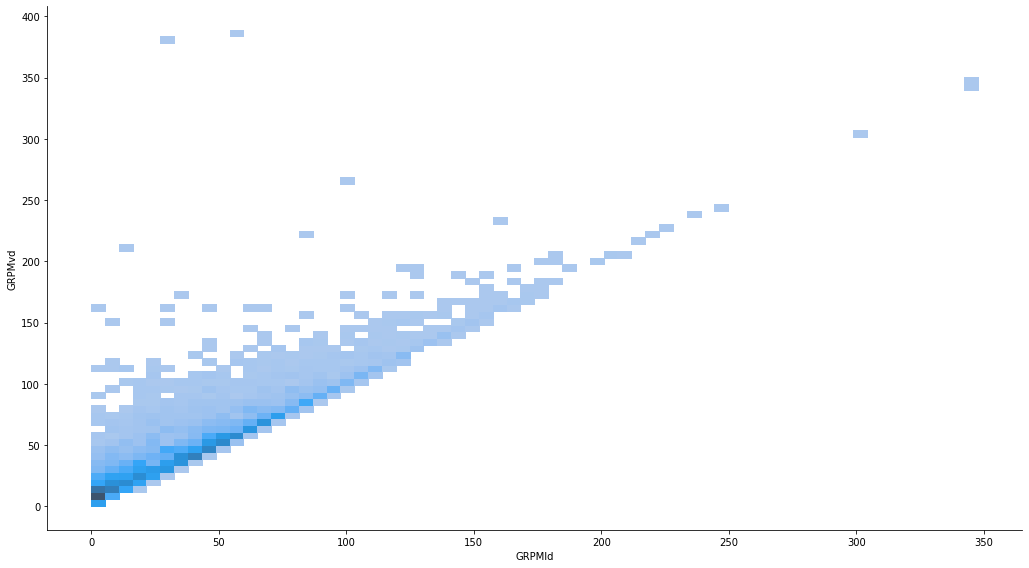

In [78]:

df2.plot(x='GRPMld', y='GRPMvd', kind= 'scatter', figsize=(15,8), title= 'GRPMvd versus GRPMld')
sns.displot(df2, x="GRPMld", y="GRPMvd", height=8, aspect=1.8)

In [35]:
labls= ['>0-1', '>1-7', '>7-15','>15-30', '>30-45', '>45']

In [37]:
df1.DaysFromFirstVend.describe()
#0,1,15,30,60
df1['DaysFromFirstVendC5']=pd.cut(df1.DaysFromFirstVend, bins=[0,1,7,15,30,45,max(df1.DaysFromFirstVend)], labels=labls, right=True)

In [40]:
df1.DaysWVend.describe()
#0,1,15,30,60
df1['DaysWVendC5']=pd.cut(df1.DaysWVend, bins=[0,1,7,15,30,45,max(df1.DaysWVend)], labels= labls, right= True)

In [75]:
df1.DaysFromFirstVendC5.unique()

['>0-1', '>1-7', '>7-15', '>15-30', '>30-45', '>45']
Categories (6, object): ['>0-1' < '>1-7' < '>7-15' < '>15-30' < '>30-45' < '>45']

In [42]:
df1['GRPMDelta']= df1.GRPMvd-df1.GRPMld

In [51]:
df3=df1.loc[df1.GRPMDelta!=0]

In [52]:
pd.crosstab(df3.DaysWVendC5, df3.DaysFromFirstVendC5)

DaysFromFirstVendC5,>1-7,>7-15,>15-30,>30-45,>45
DaysWVendC5,,,,,
>0-1,26,21,21,22,20
>1-7,68,142,86,75,101
>7-15,0,95,109,84,155
>15-30,0,0,180,184,425
>30-45,0,0,0,146,629
>45,0,0,0,0,1236


In [58]:
df3.loc[(df3.DaysFromFirstVend== 2) & (df3.DaysWVend== 1)]

,cohort_flag,location_id,accountname,InstallCap,FirstVendDate,DaysFromFirstVend,DaysWVend,Vends,Spends,DigitalVends,DigitalUsers,AppSpend,AppUser,GRPMld,GRPMvd,VPDUld,VPDUvd,ARPUld,ARPUvd,DaysFromFirstVendC5,DaysWVendC5,GRPMDelta
6,test,88ecf9b3-b002-4417-a34a-89148fce62fe,KING STREET APTS,6,2021-10-03,2,1,4,8.00,4.0,1,8.0,1,20.28000,40.5600,60.84,121.68,121.68,243.36,>1-7,>0-1,20.28000
7,control,4b21ca9e-1352-40ad-88a8-4e2bbc1455ad,1648 N KINGSLEY DR,4,2021-10-03,2,1,2,3.00,0.0,0,0.0,0,11.40750,22.8150,0.00,0.00,0.00,0.00,>1-7,>0-1,11.40750
8,test,4b431720-daaf-4fdb-bb53-718789ce7c2f,2222 LONG,2,2021-10-03,2,1,1,1.25,0.0,0,0.0,0,9.50625,19.0125,0.00,0.00,0.00,0.00,>1-7,>0-1,9.50625


In [62]:
pd.crosstab(df3.DaysWVendC5, df3.DaysFromFirstVendC5,df3.GRPMDelta, aggfunc=np.sum)

DaysFromFirstVendC5,>1-7,>7-15,>15-30,>30-45,>45
DaysWVendC5,,,,,
>0-1,407.405308,918.364468,383.026971,549.023127,642.664157
>1-7,1218.875609,2467.297136,3013.240260,2113.975721,2880.093282
>7-15,NaN,1030.661230,2932.360176,2440.272041,4919.585619
>15-30,NaN,NaN,1651.029624,3588.609761,11102.196230
>30-45,NaN,NaN,NaN,850.918081,11246.287740
>45,NaN,NaN,NaN,NaN,8230.290940


In [76]:
df3.loc[(df3.DaysWVend.between(30,45))& (df3.DaysFromFirstVend > 45), ['location_id','InstallCap', 'Spends', 'DaysFromFirstVend','DaysWVend', 'GRPMld', 'GRPMvd', 'GRPMDelta']].sort_values('GRPMDelta', ascending= False).head(20)

,location_id,InstallCap,Spends,DaysFromFirstVend,DaysWVend,GRPMld,GRPMvd,GRPMDelta
2272,efece894-c480-4b64-b0a4-4395881927e5,2,472.25,60,37,119.715375,194.133041,74.417666
2566,220590,2,652.00,61,43,162.572459,230.626047,68.053587
3157,6dbf9208-f001-4a4d-a7f6-e97841d2f9ce,1,261.00,62,42,128.058387,189.038571,60.980184
2956,4420434,2,232.75,62,30,57.098831,118.004250,60.905419
2961,4425706,2,229.00,62,30,56.178871,116.103000,59.924129
2466,5c49fe8d-6a09-48e9-9a9d-922713a53186,2,245.75,61,31,61.276352,120.576048,59.299696
3022,37ca8f31-7a95-4ca8-a043-ccfea4a2dc62,4,585.75,62,35,71.848851,127.275107,55.426256
2492,8c3b849a-dfd5-430a-ab2f-20c9372d1c86,2,296.75,61,35,73.992910,128.959071,54.966162
2256,b5ff7766-064d-4096-aba9-6707b6bfd22b,2,247.75,60,32,62.804625,117.758672,54.954047
2997,997ef8c8-bc26-4f57-a385-ff2a30253456,2,252.75,62,33,62.005282,116.494773,54.489490


In [57]:
df1.describe()

,InstallCap,DaysFromFirstVend,DaysWVend,Vends,Spends,DigitalVends,DigitalUsers,AppSpend,AppUser,GRPMld,GRPMvd,VPDUld,VPDUvd,ARPUld,ARPUvd,GRPMDelta
count,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000,4503.000000
mean,8.812347,48.160338,34.078170,437.324006,601.240913,145.390628,13.818343,149.547173,7.158561,43.448881,57.347654,5.646890,9.839829,9.870854,15.633559,13.898774
std,8.484240,18.199120,20.171601,662.630508,944.524402,398.984688,31.282065,405.972348,16.367739,80.286987,80.897428,5.680256,14.752662,10.436434,22.814472,18.147344
min,1.000000,1.000000,1.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.012967,0.330652,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,36.000000,15.000000,71.000000,97.750000,7.000000,2.000000,3.500000,1.000000,14.819743,29.152500,2.253333,3.802500,2.028000,3.456818,2.426612
50%,6.000000,60.000000,35.000000,224.000000,313.500000,45.000000,6.000000,42.000000,3.000000,35.696939,49.594309,4.770409,6.800570,8.025553,11.284839,8.175375
75%,11.000000,62.000000,54.000000,535.000000,744.500000,144.500000,15.000000,145.500000,8.000000,60.208805,74.702024,7.469153,10.843376,14.259375,19.257037,18.759292
max,186.000000,62.000000,62.000000,13450.000000,23521.250000,13309.000000,828.000000,12939.500000,442.000000,4816.384773,4816.384773,121.680000,433.485000,124.215000,650.227500,351.000000
